In [62]:
import numpy as np
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
from torch import nn
import torch as th


In [24]:
class Dense_layer:
    def __init__(self, n_inputs, n_neurons):
        """_summary_

        Args:
            n_inputs (int): feature size
            n_neurons (int): no of neurons in a layer
        """
        self.weights = np.random.ranf(size=(n_inputs, n_neurons))
        self.biases = np.zeros(shape=(1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class ActivationReLu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)


class ActivationSoftmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

In [25]:
ipts = [-4, -9, -2, 8]
layer1 = Dense_layer(4, 7)
ipt1 = layer1.forward(ipts)

# layer2 = Dense_layer(2,5)
# ipt2 = layer2.forward(ipt1)


# layer3 = Dense_layer(5,1)
# ipt3 = layer3.forward(ipt2)

In [26]:
data = spiral_data(samples=100, classes=3)

X, y = data

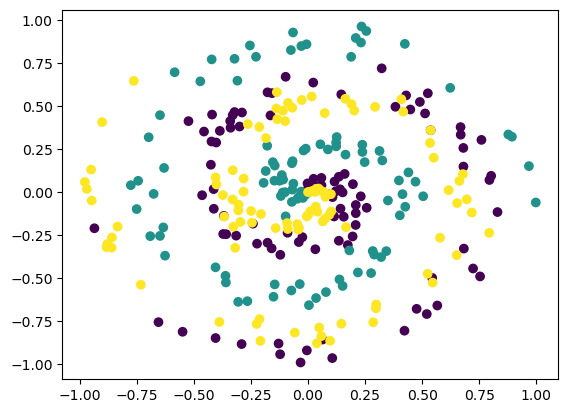

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [28]:
dense1 = Dense_layer(2, 3)

activation1 = ActivationReLu()

dense2 = Dense_layer(3, 3)

activation2 = ActivationSoftmax()

dense1.forward(X)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

activation2.forward(dense2.output)

In [29]:
activation2.output[:5]

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33226681, 0.3341118 , 0.33362139],
       [0.33113401, 0.33484216, 0.33402383],
       [0.32943367, 0.33394905, 0.33661728],
       [0.32808673, 0.33466128, 0.33725198]])

In [ ]:
def proj_eq(h0: float, u: float, t: np.array):
    g = 9.8
    return h0 + u * t - 0.5 * g * t**2


In [ ]:
h0 = 3
u = 3
t = np.linspace(0, 5, 20)
y = proj_eq(h0=h0, u=u, t=t)
y_hat = y + 5 * np.random.randn(len(y))
y_hat

array([   7.06523375,   -3.71070077,    1.80412977,   12.83501427,
          3.31644487,   -0.41636385,   -4.55531247,   -8.11631478,
         -8.68785798,  -17.01877415,  -29.35916921,  -38.2427241 ,
        -38.8621703 ,  -48.25707175,  -60.70904697,  -65.59946756,
        -69.82198655,  -73.14165223,  -89.67000405, -107.94983384])

In [79]:
t

0

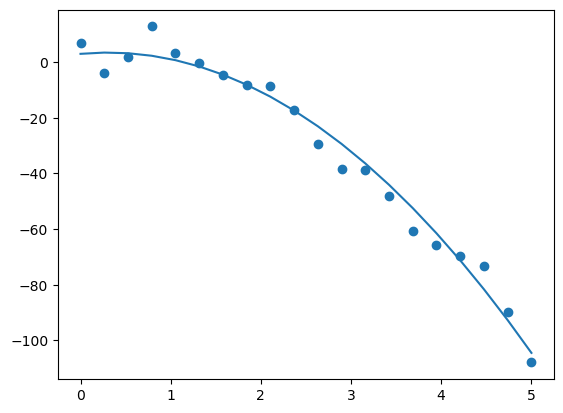

In [ ]:
plt.plot(t, y)
plt.scatter(t, y_hat)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(20, 5),
            nn.ReLU(),
            nn.Linear(5, 20),
        )

    def forward(self, x):
        return self.linear_relu_stack(x)


In [ ]:
t = np.linspace(0, 5, 20)

In [ ]:
nn_pinn = NeuralNetwork()

t = th.tensor(t, dtype=th.float32, requires_grad=True)
y = th.tensor(y, dtype=th.float32)
y_hat = th.tensor(y_hat, dtype=th.float32)

learning_rate = 0.01
opt = th.optim.Adam(nn_pinn.parameters(), lr=learning_rate)
ctr = th.nn.MSELoss()
for u in range(200):
    y_pred = nn_pinn.forward(t)

    loss = ctr(y_pred, y_hat)
    # loss = (y_pred - y_hat).pow(2).sum()
    if u % 100 == 99:
        print(u, loss.item())

    # Use autograd to compute the backward pass.
    opt.zero_grad()
    loss.backward()

    opt.step()

C:\Users\PAndA\AppData\Local\Temp\ipykernel_4712\3810328652.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y  = th.tensor(y ,dtype=th.float32)
C:\Users\PAndA\AppData\Local\Temp\ipykernel_4712\3810328652.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_hat = th.tensor(y_hat,dtype=th.float32)


99 114.48768615722656
199 0.15620091557502747


In [ ]:
def derivative(y, x):
    """
    Computes dy/dx using PyTorch's autograd.
    y and x must be tensors with requires_grad=True for x.
    """
    return th.autograd.grad(y, x, grad_outputs=th.ones_like(y), create_graph=True)[0]

In [104]:
t = th.tensor(t, dtype=th.float32, requires_grad=True)
t, nn_pinn(t).detach()

C:\Users\PAndA\AppData\Local\Temp\ipykernel_4712\2883504854.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = th.tensor(t,dtype=th.float32,requires_grad=True)


(tensor([0.0000, 0.2632, 0.5263, 0.7895, 1.0526, 1.3158, 1.5789, 1.8421, 2.1053,
         2.3684, 2.6316, 2.8947, 3.1579, 3.4211, 3.6842, 3.9474, 4.2105, 4.4737,
         4.7368, 5.0000], requires_grad=True),
 tensor([   7.0676,   -3.7104,    1.8043,   12.8343,    3.3171,   -0.4163,
           -4.5559,   -8.1160,   -8.6888,  -17.0249,  -29.3680,  -38.2420,
          -38.9002,  -48.3012,  -60.8087,  -65.7417,  -69.9768,  -73.3092,
          -90.2735, -106.3866]))

In [ ]:
y_div = derivative(nn_pinn(t), t)

In [ ]:
dydt_true = u - g * t

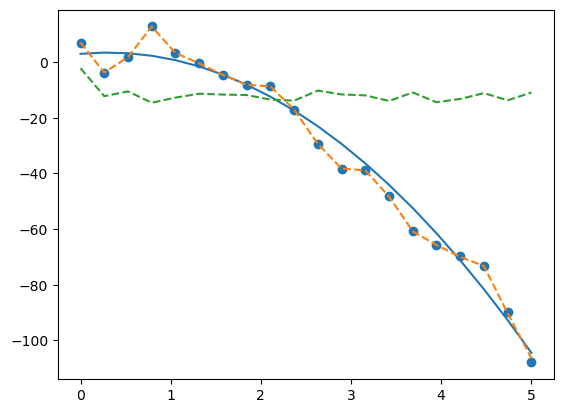

In [109]:
plt.plot(t.detach().numpy(), y)
plt.scatter(t.detach().numpy(), y_hat)
plt.plot(t.detach().numpy(), nn_pinn(t).detach().numpy(), ls="--")
plt.plot(t.detach().numpy(), y_div.detach(), ls="--")

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(20, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5, 20),
        )

    def forward(self, x):
        return self.linear_relu_stack(x.T)


x = np.linspace(0, 7, 20)
y = np.sin(x)


y_hat = y + np.random.randn(len(x)) / 8

x = th.tensor(x, dtype=th.float32)

y_hat = th.tensor(y_hat, dtype=th.float32)

In [ ]:
y, y_pred

(array([ 0.        ,  0.36014289,  0.67195255,  0.89358235,  0.99528832,
         0.96342094,  0.80225698,  0.53342557,  0.19300541, -0.17331717,
        -0.5163796 , -0.79014095, -0.95786089, -0.99703045, -0.90239284,
        -0.68664899, -0.37875293, -0.02002607,  0.3413884 ,  0.6569866 ]),
 tensor([ 0.1191,  0.2184,  0.8188,  0.7930,  1.1270,  1.0084,  0.7182,  0.4940,
          0.0353, -0.2202, -0.6139, -0.5678, -0.8397, -1.0813, -0.8326, -0.5302,
         -0.4000, -0.0943,  0.3559,  0.7274], grad_fn=<ViewBackward0>))

In [32]:
neu_ntr = NeuralNetwork()
learning_rate = 0.01
opt = th.optim.Adam(neu_ntr.parameters(), lr=learning_rate)
ctr = th.nn.MSELoss()
for t in range(2000):
    y_pred = neu_ntr.forward(x)

    loss = ctr(y_pred, y_hat)
    # loss = (y_pred - y_hat).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    opt.zero_grad()
    loss.backward()

    opt.step()

99 4.7625335355405696e-06
199 1.9342176471592865e-10
299 3.25919855136852e-15
399 1.4190038033490282e-15
499 5.543482509238074e-15
599 4.430483757644765e-15
699 1.2743278654525625e-14
799 1.1508155539630138e-14
899 1.833311502608126e-09
999 9.833663483505006e-08
1099 1.3606407667232645e-12
1199 7.2422528044069345e-12
1299 1.6251259182809008e-07
1399 1.2011227949748626e-11
1499 1.150149447253293e-13
1599 9.70702512859134e-06
1699 2.0577180237513204e-10
1799 7.71674374112864e-15
1899 1.2355059197943774e-08
1999 7.187138661990389e-10


In [33]:
print(neu_ntr(x))

tensor([-0.0141,  0.4660,  0.6150,  0.8260,  0.9089,  1.0628,  0.9580,  0.6338,
        -0.0695, -0.2157, -0.5398, -0.7846, -0.8834, -1.2565, -1.0102, -0.3931,
        -0.4773,  0.0490,  0.4967,  0.8333], grad_fn=<ViewBackward0>)


In [34]:
neu_ntr.eval()


NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=20, bias=True)
  )
)

In [35]:
y__ = neu_ntr(x).detach().numpy()

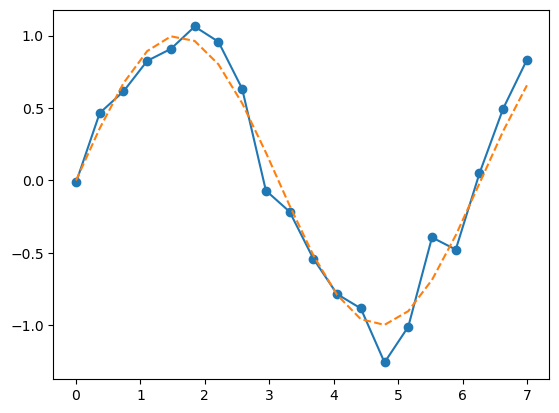

In [36]:
plt.plot(x, y__)
plt.plot(x, y, ls="--")

plt.scatter(x, y_hat)

In [37]:
x, y_hat

(tensor([0.0000, 0.3684, 0.7368, 1.1053, 1.4737, 1.8421, 2.2105, 2.5789, 2.9474,
         3.3158, 3.6842, 4.0526, 4.4211, 4.7895, 5.1579, 5.5263, 5.8947, 6.2632,
         6.6316, 7.0000]),
 tensor([-0.0140,  0.4658,  0.6155,  0.8263,  0.9095,  1.0633,  0.9582,  0.6343,
         -0.0697, -0.2157, -0.5402, -0.7847, -0.8838, -1.2568, -1.0107, -0.3934,
         -0.4774,  0.0490,  0.4967,  0.8334]))

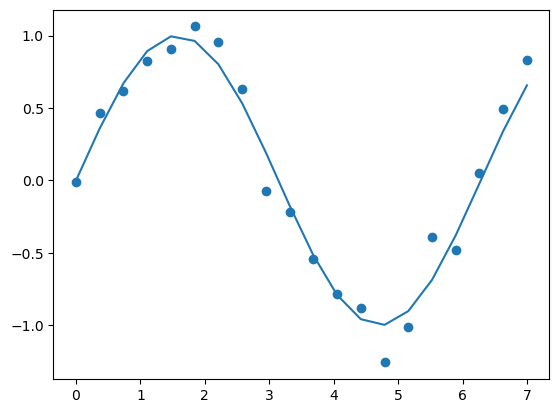

In [38]:
plt.plot(x, y)
plt.scatter(x, y_hat)

In [39]:
# mt = [a11 ,a12 ,a13], [a21 ,a22 ,a23], [a3 1 ,a32 ,a33]]

In [ ]:
import numpy as np

mtx = [[1, 5, 3], [4, 3, 2], [4, 1, 1]]


# len --> matrix[0] --> col
# len --> matrix --> row
def solutions(matrix):
    for i in range(0, len(matrix)):
        for j in range(i, len(matrix[0]) - 1):
            if matrix[i][j] != 0:
                print(f"i -> {i}\n j -> {j}")
                matrix[i + 1][j] = (
                    matrix[i + 1][j] - (matrix[i + 1][j] / matrix[i][j]) * matrix[i][j]
                )


solutions(mtx)

i -> 0
 j -> 0
i -> 0
 j -> 1


In [41]:
mtx

[[1, 5, 3], [0.0, 0.0, 2], [4, 1, 1]]

In [ ]:
mtx = [[1, 5, 3], [4, 3, 2], [4, 1, 1]]

np.triu(mtx)

array([[1, 5, 3],
       [0, 3, 2],
       [0, 0, 1]])